# Business problem 

**Description**

A good understanding of customers is extremely important for running a successful business. KYC or know your customer is what actually makes all the difference for many companies. KYC helps them do their best in creating, communicating and delivering their offerings by tailoring them to their customers needs. This makes customer analytics the most integral part of the marketing function of a company.

**Problem Statement**



*   Identify the purchase probability of a customer from a particular product category.
*   Identify the brand choice probability of a customer.
*   Identify the purchase quantity from particular brand by the customer.


# Business Objectives and Constraints



1. Interpretability is highly important. 
2. Devise introductory plans based on STP framework for clusters.
3. Cost of mis-classification is of level moderate to high.
4. No strict latency concerns. 



# **Data**

Dataset is obtained from a B2C model. This means that the clients are individual people rather than firms or institutions.This comes from a fast moving consumer goods or FMCG sector.

Segmentation Dataset (**Seg_data**)

1. This dataset contains 7 demographic and geographic features.
2. Amongst these 7 features, 5 features have been encoded.

# Reading data

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [ ]:
df_seg= pd.read_csv('Seg_data.csv', index_col = 0)

In [ ]:
df_seg.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
#Descriptive analysis on the features
df_seg.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


For continuous variables, age and income, we observe that mean age is 36 years and mean income is 121,000.
This serves the purpose of targeting products that are relevant for mid to late 30s age group.

# **Correlation estimate**

The features in the dataset are normally distributed and linearly correlated, hence *Pearson r correlation* is used for correlation analysis.

In [ ]:
df_seg.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


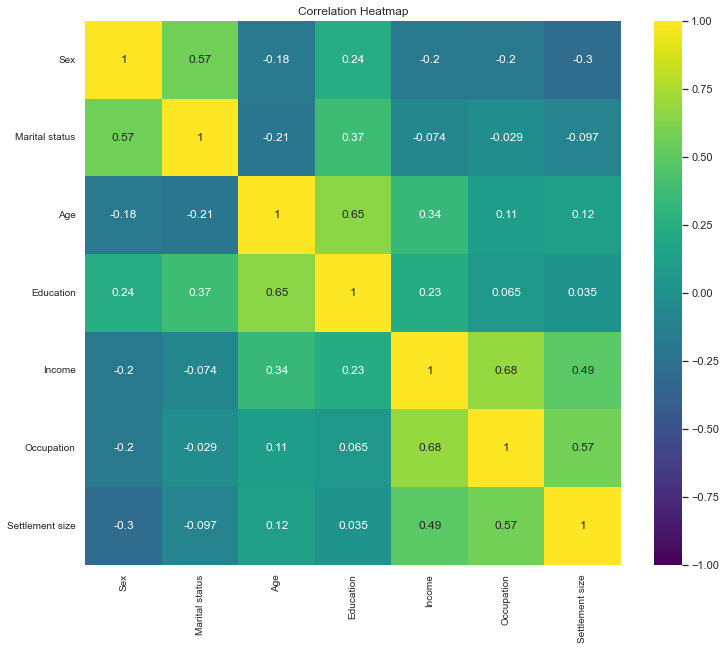

In [ ]:
# Heat-map for correlation
plt.figure(figsize = (12,10) )
# Limiting the range of correlation coefficients for interpretability
s = sns.heatmap ( df_seg.corr(),
                annot=True,
                cmap='viridis',
                vmin=-1,
                vmax=1 )

s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=10)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=10)
plt.title('Correlation Heatmap')
plt.show()

**Inferences**

1. Strong correlation exist between age and education.
2. Strong correlation exist between income and occupation.
3. Strong correlation exist between sex and marital status.
4. Strong correlation exist between occupation and settlement size.

# **Standardization**

In [ ]:
scaler=StandardScaler()
seg_std=scaler.fit_transform(df_seg)

# **Hierarchical Clustering**

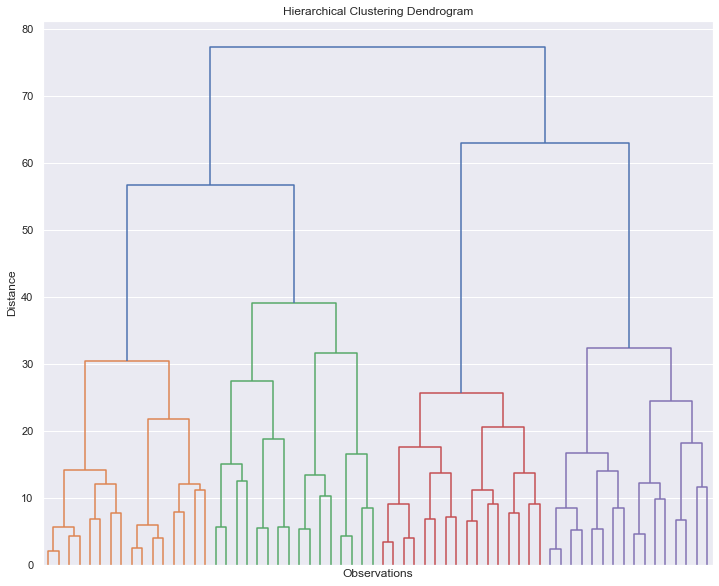

In [ ]:
# Hierarchical clustering to obtain an overview of the clusters
hier_clust=linkage(seg_std,method='ward')

plt.figure(figsize=(12,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
          truncate_mode='level',
          p=5,
          show_leaf_counts=False,
          no_labels=True
          )
plt.show()

The clustering solution here would be the vertical line from distance 39 to 56 as it is not intercepted by any of the other horizontal line. By making a cut along this vertical line we observe that there are 4 distinctive clusters which are formed. Hence, this could be our solution. For better interpretability we will next apply flat clustering methods.

# **K-Means Clustering**

In [ ]:
#Elbow method to know the number of clusters,i.e, value of k
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init= 'k-means++', random_state= 42)
    #k-means++ will run before k-means and help in finding the initial centroids
    kmeans.fit(seg_std)
    wcss.append(kmeans.inertia_)

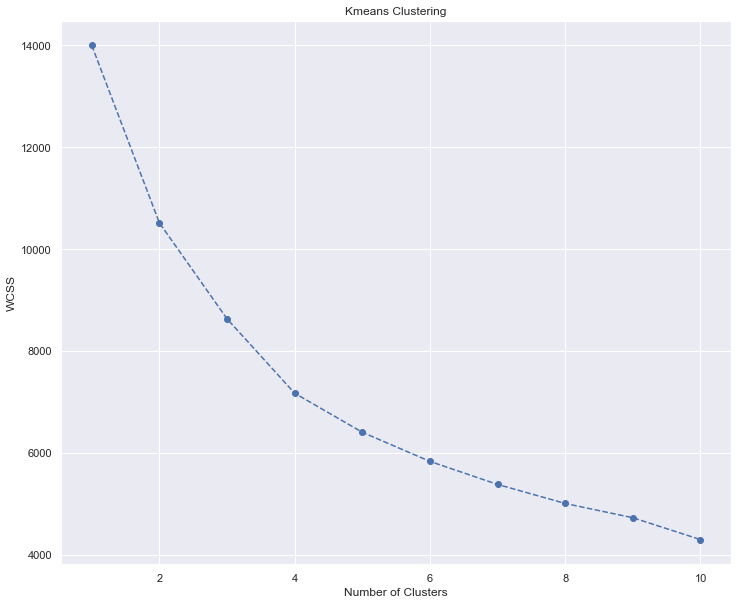

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans Clustering')
plt.show()

We can see steep decline of the graph till 4 clusters and smoothening of the graph decline post 4 clusters. So, number of clusters are set to be 4.
We also obtain this 4 clusters result from hierachical clustering which only reaffirms our k-means algorithm results. 

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++', random_state=42)
kmeans.fit(seg_std)

KMeans(n_clusters=4, random_state=42)

**Results of K-means**

In [ ]:
df_seg_kmeans=df_seg.copy()
# Addition of new feature Segment K-means, it will contain the predicted clusters for each observation in the dataset
df_seg_kmeans['Segment K-Means']=kmeans.labels_
df_seg_analy= df_seg_kmeans.groupby(['Segment K-Means']).mean()
df_seg_analy

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


1. Segment 0 is the oldest segement as observed by the mean age of 55 years. More than 2/3rd are in relationships and they also have the highest level of education as well as the highest income. This is the segment which are **Well-Off Customers.**

2. Segment 1 has 2/3rd male customers and almost all are single. They live exclusively in small cities and has lowest mean income. This is the segment of customers with **Fewer Opportunities.**

3. Segment 2 is the youngest segment with almost all are in relationships. They seem equally distributed in small and mid size cities. They seem average in every parameter. This segemnt of customers are **Standard Customers.**

4. Segment 3 comprised entirely of male and less than 20 percent are in relationships. The segment has low value of education but with high value of income and occupation. The majority of this segemnt lives in big cities, so this segment of customers are **Career Focused Customers.**

In [ ]:
# Addition of 2 new features Number Obs and Proportion Obs
# Number Obs contains total number of obserations and Proportion Obs contains proportions of the segments
df_seg_analy['Number Obs'] = df_seg_kmeans[['Segment K-Means','Sex']].groupby(['Segment K-Means']).count()
df_seg_analy['Proportion Obs'] = df_seg_analy['Number Obs'] / df_seg_analy['Number Obs'].sum()
df_seg_analy

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number Obs,Proportion Obs
Segment K-Means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [ ]:
df_seg_analy.rename({0:'Well-Off Customers',
                    1:'Fewer Opportunities',
                    2:'Standard Customers',
                    3:'Career Focused Customers'
                    })

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number Obs,Proportion Obs
Segment K-Means,,,,,,,,,
Well-Off Customers,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard Customers,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career Focused Customers,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850




*   The smallest segment is the Well-Off Customers comprising the 13 percent of the dataset. 
*   The largest segment is the Standard Customers comprising the 35 percent of the dataset.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


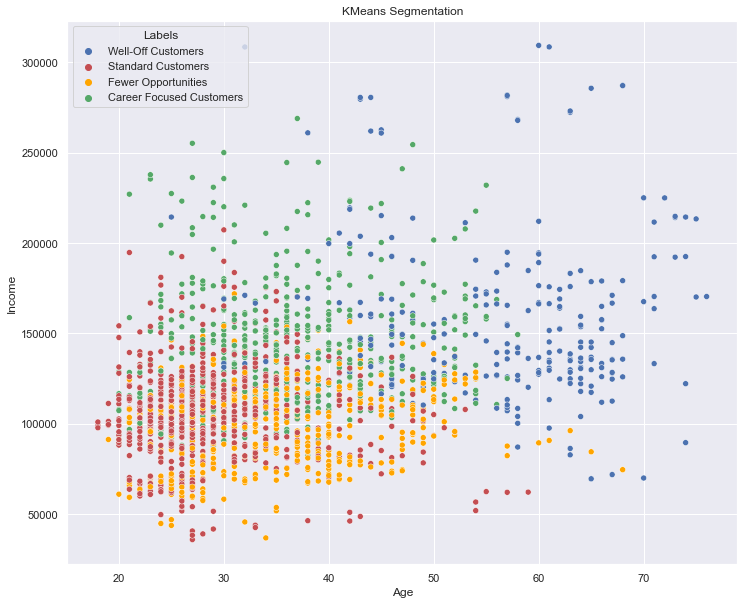

In [ ]:
# Visualization of the dataset
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment K-Means'].map({0:'Well-Off Customers',
                                                                1:'Fewer Opportunities',
                                                                2:'Standard Customers',
                                                                3:'Career Focused Customers'
                                                                })

# Only Age and Income are continuous variables, rest are categorical values.
x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis,y_axis,hue=df_seg_kmeans['Labels'],palette=['b','r','orange','g'])
plt.title('KMeans Segmentation')
plt.show()

The Well-Off Customers can be clearly distinguised as they are oldest with high income.

However, rest of the segments are still not as much distinguisable as the Well-Off Customers.

# Principal Component Analysis (PCA)

In [ ]:
pca=PCA()

In [ ]:
pca.fit(seg_std)
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

As there are 7 features in our dataset, PCA creates 7 new components based on them and it can be seen that while some of the components contain large proportion of the variance while others almost none.

Text(0, 0.5, 'Cumulative Explained Variance')

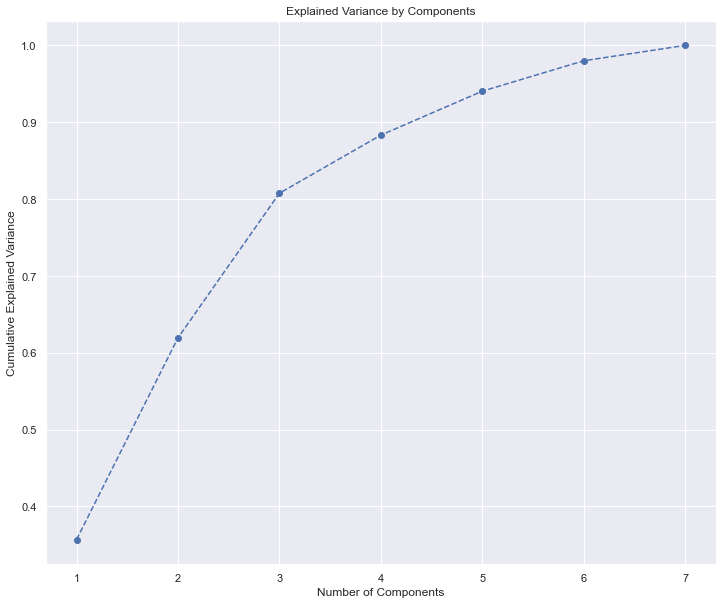

In [ ]:
# Cumulative Explained Variance to select number of components
plt.figure(figsize=(12,10))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

* If we choose 2 components, we preserve around 60 percent of the information.
* If we choose 3 components, we preserve around 80 percent of the information.
* If we choose 4 components, we preserve around 90 percent of the information. This seems as an apt solution as addition of another component doesn't yield major change.



In [ ]:
pca=PCA(n_components=4)

In [ ]:
pca.fit(seg_std)

PCA(n_components=4)

**PCA Results**

In [ ]:
# Reduction of 7 components into 4 components for each original feature, hence 4x7 matrix
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

The (loading) values in this array shows the correlation between an original feature and the component.

In [ ]:
# Indexing by components
df_pca_comp= pd.DataFrame(data = pca.components_,
                          columns = df_seg.columns.values,
                          index = ['Component 1','Component 2','Component 3','Component 4']
                         )
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


([<matplotlib.axis.YTick at 0x17184072be0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

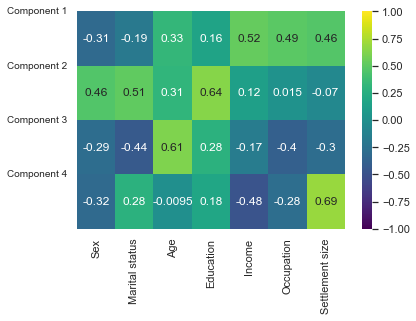

In [ ]:
# Visualization of the correlation values
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            cmap='viridis',
            annot=True
            )

plt.yticks([0,1,2,3],
           ['Component 1','Component 2','Component 3','Component 4'],
           fontsize=10)



*   **Component 1** have positive correlation with age, education, income, occupation and settlement size. These features directly relate to career of an individual. So this component shows career focus of the individual.

*   **Component 2** shows sex, marital status and education as the prominent determinants and almost uncorrelated with other career focused features. So this component shows the education and lifestyle of an individual.
*   **Component 3** shows age, marital status and occupation as the prominent determinants. The negative correlation of marital status and occupation indicates that even if the individual is old, it doesn't matter with the life experience or work experience.


*   **Component 4** shows settlement size and income as prominent determinants. The negative correlation with the income and positive correlation with settlement size indicates that these individual exist in groups, either through relationships or in sharing apartments.



In [ ]:
# Transforming the original features from the standardized dataset into the PCA components form
pca.transform(seg_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]])

In [ ]:
# Saving the above PCA scores in a new variable for further analysis 
scores_pca = pca.transform(seg_std)

# K-Means with PCA Clustering

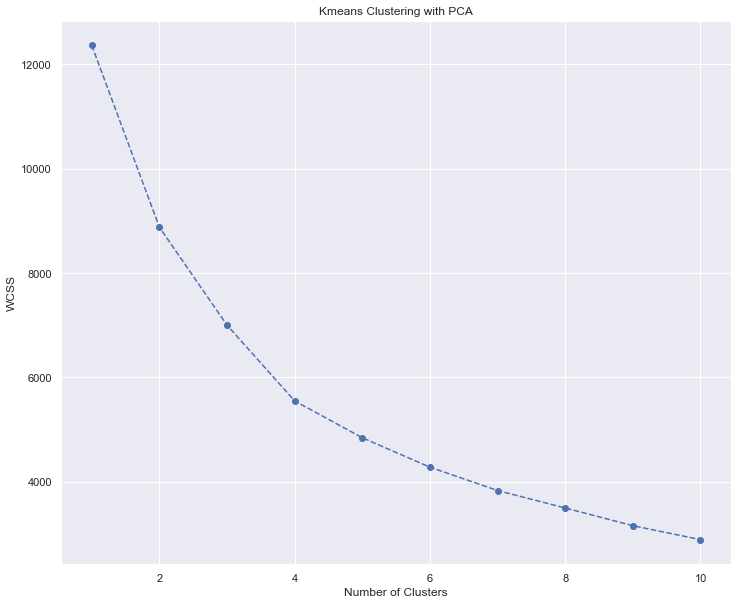

In [ ]:
wcss=[]

for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i, init= 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(12,10))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans Clustering with PCA')
plt.show()

The steep decline is observed to 4 clusters and then gradual decline of the graph. Hence, the number of clusters to be chosen are 4.

In [ ]:
kmeans_pca=KMeans(n_clusters = 4 , init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

# K-means with PCA Clustering Results

In [ ]:
# Creation of new dataframe to add the  values of the seperate PCA scores components to segmentation dataset
df_seg_pca_kmeans = pd.concat([df_seg.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_seg_pca_kmeans.columns.values[-4:] = ['Component 1','Component 2','Component 3', 'Component 4']
# Creation of new feature to depict the respective component number 
df_seg_pca_kmeans['K-Means PCA'] = kmeans_pca.labels_

In [ ]:
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,K-Means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,-0.945916,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,-0.736766,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,-0.131774,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,-0.042606,0


In [ ]:
# Calculating mean values of the features and grouping it by components
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['K-Means PCA']).mean()
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
K-Means PCA,,,,,,,,,,,
0,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662
1,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736
2,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869


Although a new dataframe is obtained with completely different values than the Kmeans without PCA, it can still be related to the segments as defined earlier.
*   Component 1 and Componet 2 have highest values in cluster 3. As these components represented career and lifestyle respectively, the cluster 3 can be easily seen as **Well-Off Customers.**
*  Component 3 is high in cluster 2 with low values of components 1 and 2. As component 3 represented the experience category, this cluster 2 is of **Fewer Opportunities.**
*   Component 1 is high in cluster 1 but with low value of component 2. It is somewhat independent from component 3 and 4 and hence these are the **Career Focused Customers.**
*   Component 1 is low in cluster 0 with independent in component 4. Hence, this cluster 0 is the youngest customers with low in relationships and are **Standard Customers.**








In [ ]:
# Identification of the number and proportion of the observations
df_seg_pca_kmeans_freq['Number Obs'] = df_seg_pca_kmeans[['K-Means PCA','Sex']].groupby(['K-Means PCA']).count()
df_seg_pca_kmeans_freq['Proportion Obs'] = df_seg_pca_kmeans_freq['Number Obs'] / df_seg_pca_kmeans_freq['Number Obs'].sum()

# Addition of Labels by renaming the clusters 
df_seg_pca_kmeans_freq = df_seg_pca_kmeans_freq.rename({0:'Standard Customers',
                                                        1:'Career Focused Customers',
                                                        2:'Fewer Opportunities',
                                                        3:'Well-Off Customers'
                                                        })
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Number Obs,Proportion Obs
K-Means PCA,,,,,,,,,,,,,
Standard Customers,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662,674,0.3370
Career Focused Customers,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736,573,0.2865
Fewer Opportunities,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684,489,0.2445
Well-Off Customers,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,264,0.1320


The largest segment is the Standard Customers with 674 observations or 33.7 percent of the observations with smallest segemnt being the Well-Off Customers with only 264 observations or 13.2 percent of the observations.

In [ ]:
# Visualization
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['K-Means PCA'].map({0:'Standard Customers',
                                                                    1:'Career Focused Customers',
                                                                    2:'Fewer Opportunities',
                                                                    3:'Well-Off Customers'
                                                                    })

**2-D Visualization of the clusters**

Every component reveals different information about an individual, hence all the combinations of components needs to be observed to see which fits best.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


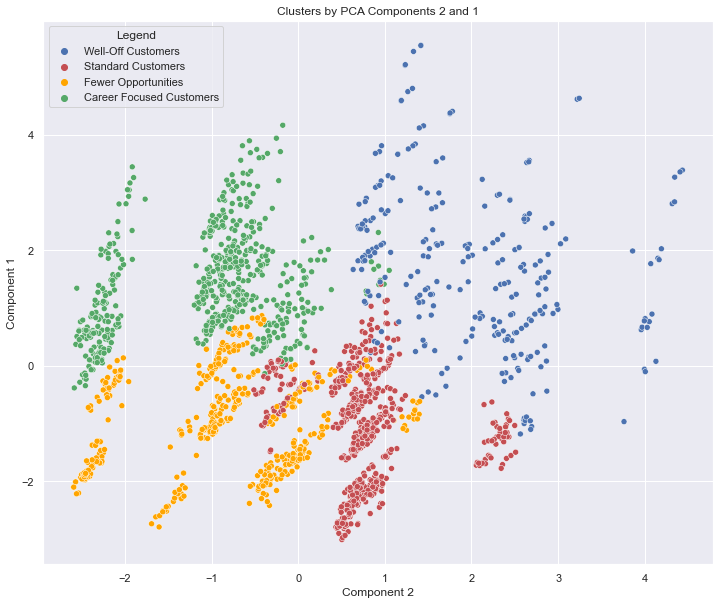

In [ ]:
 
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['b','r','orange','g'])
plt.title('Clusters by PCA Components 2 and 1')
plt.show()

Best case scenario of 2-D visualization based on other upcoming subsequent plots.

* Well-Off Customers with Blue colour clearly form a seperate cluster.
*   Career Focused Customers with green colour  clearly form a seperate cluster.
*   Fewer Opportunities and Standard Customers with Yellow and Red colour repectively forms clusters but some datapoints from them overlap in this 2-D visualization.

This visualization is more pronounced than k-means without PCA where only well-off customers can be distinguished easily.





C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


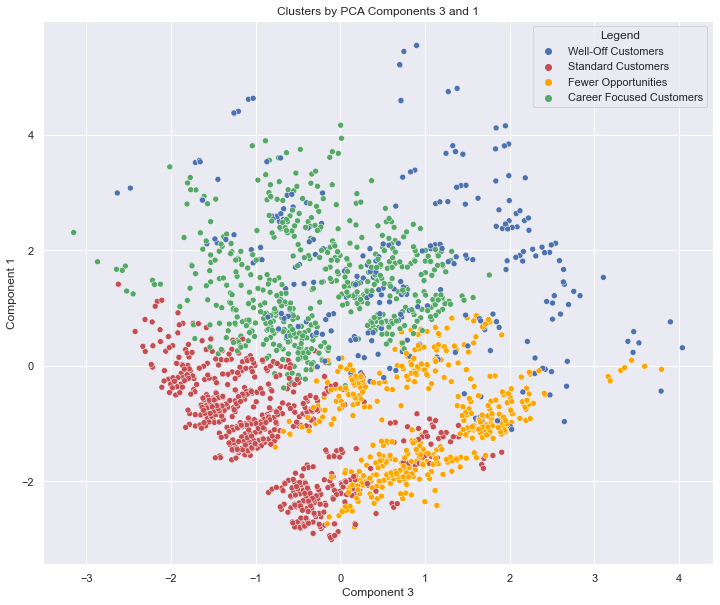

In [ ]:
x_axis = df_seg_pca_kmeans['Component 3']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['b','r','orange','g'])
plt.title('Clusters by PCA Components 3 and 1')
plt.show()

Only Standard Customers seem to form a seperate cluster. Hence this visualization based on these components is worse than the previous one.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


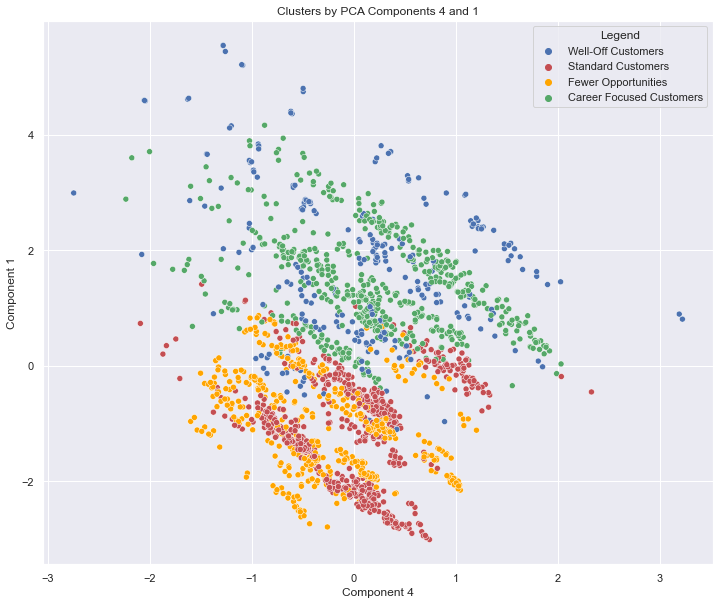

In [ ]:
x_axis = df_seg_pca_kmeans['Component 4']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['b','r','orange','g'])
plt.title('Clusters by PCA Components 4 and 1')
plt.show()

No seperate clusters.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


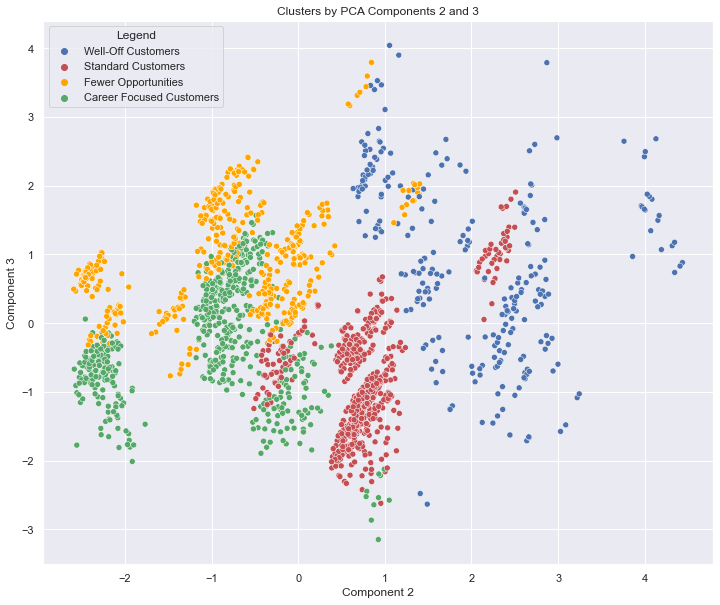

In [ ]:
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 3']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['b','r','orange','g'])
plt.title('Clusters by PCA Components 2 and 3')
plt.show()

No seperate clusters.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


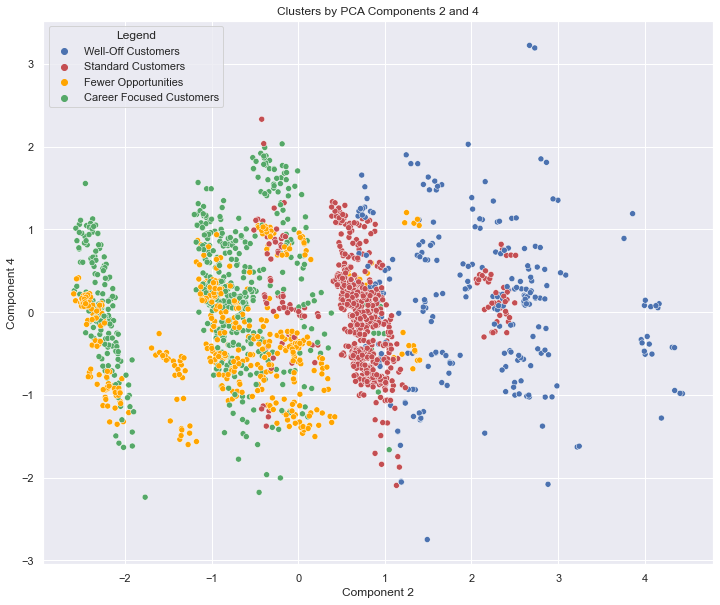

In [ ]:
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 4']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['b','r','orange','g'])
plt.title('Clusters by PCA Components 2 and 4')
plt.show()

No seperate clusters.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


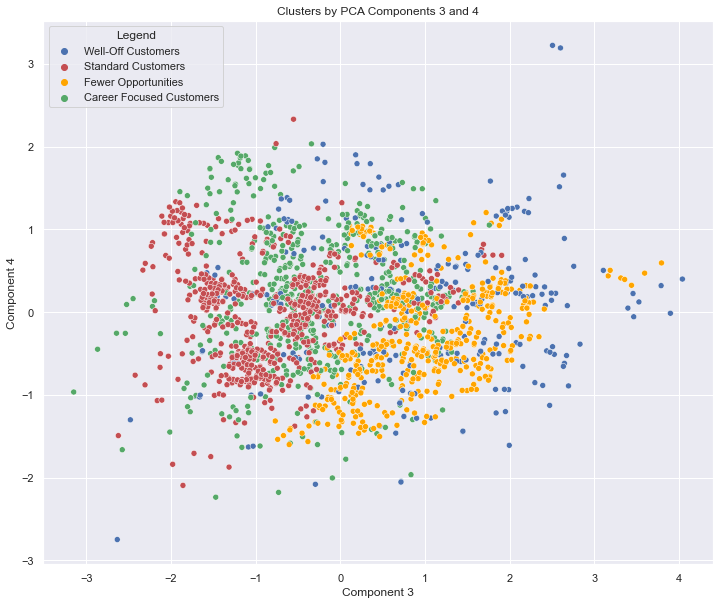

In [ ]:
x_axis = df_seg_pca_kmeans['Component 3']
y_axis = df_seg_pca_kmeans['Component 4']
plt.figure(figsize=(12,10))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['b','r','orange','g'])
plt.title('Clusters by PCA Components 3 and 4')
plt.show()

This is the worst case scenario to visualize as no seperate clusters can be seen and most of the datapoints are overlapped.

# Data Export

In [ ]:
# Scaler contains the mean and standard deviation of original data.
# It is required to pre-process the future data.
pickle.dump(scaler, open('scaler.pickle','wb'))

In [ ]:
# PCA and Kmeans_pca will segment new data points based on the criteria developed beforehand
pickle.dump(pca,  open('pca.pickle','wb'))

In [ ]:
pickle.dump(kmeans_pca,open('kmeans'))